In [134]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [135]:
img_fname = 'RCTG/pngs/RCTG/1/RCTG_1_8.png'

In [136]:
img = cv.imread(img_fname)

In [137]:
def imshow(image : np.ndarray, title='image', fx=0.25, fy=0.25, use_cv=False):
    if not use_cv:
        image_to_show = image.copy()
        if len(image.shape) == 2 or image.shape[2] == 1:
            image_to_show = cv.cvtColor(image_to_show, cv.COLOR_GRAY2RGB)
        else:
            image_to_show = cv.cvtColor(image_to_show, cv.COLOR_BGR2RGB)
        plt.imshow(image_to_show)
    else:
        cv.imshow(title, cv.resize(image, (0, 0), fx=fx, fy=fy))
        cv.waitKey(0)
        cv.destroyAllWindows()

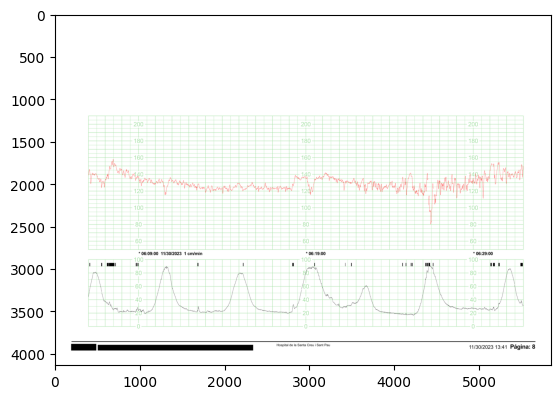

In [138]:
imshow(img, fx=0.2, fy=0.2)

In [139]:
b, g, r = cv.split(img)

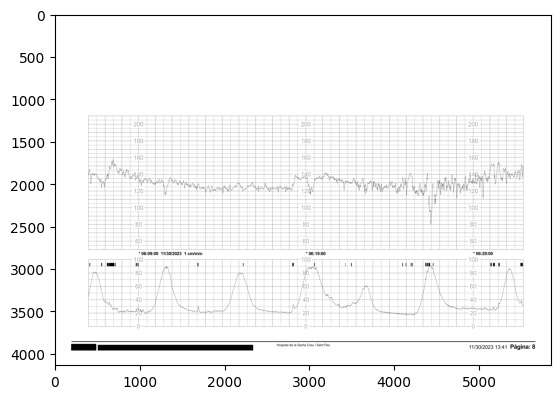

In [140]:
imshow(r, 'r')
imshow(g, 'g')
imshow(b, 'b')

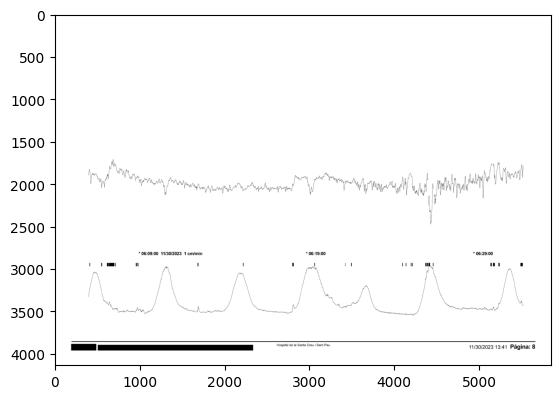

In [141]:
_, g_mask = cv.threshold(g, 150, 255, cv.THRESH_BINARY)
imshow(g_mask)

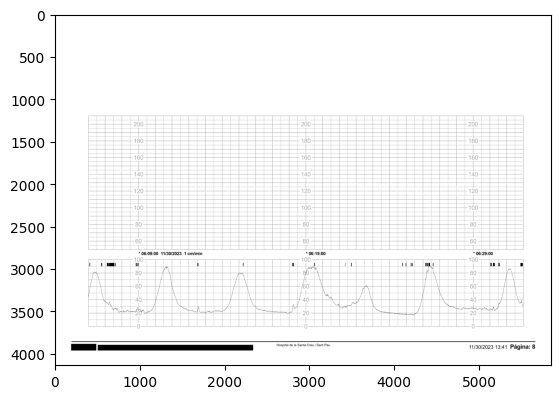

In [142]:
imshow(r, 'r')

In [143]:
r.shape

(4135, 5847)

(4135, 5847)


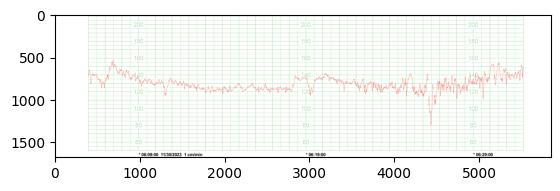

In [144]:
upper_graph_mask = np.uint8(np.zeros(img.shape[:2]))
print(upper_graph_mask.shape)
start = 1175
end = start + 1675
cv.rectangle(upper_graph_mask, (0, start), (img.shape[1], end), 255, -1)
imshow(upper_graph_mask)
upper_graph = cv.bitwise_and(img, img, mask=upper_graph_mask)
# _, upper_graph_mask = cv.threshold(upper_graph_mask, 0, 255, cv.THRESH_BINARY)
upper_graph = upper_graph[start:end, 0:img.shape[1]]
imshow(upper_graph)

In [145]:
upper_graph_b, upper_graph_g, upper_graph_r = cv.split(upper_graph)

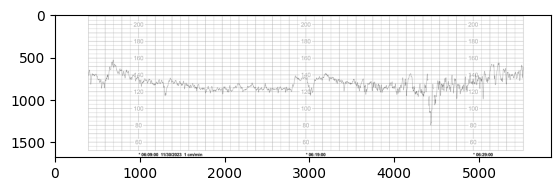

In [146]:
imshow(upper_graph_r, 'upper graph r')
imshow(upper_graph_g, 'upper graph g')
imshow(upper_graph_b, 'upper graph b')

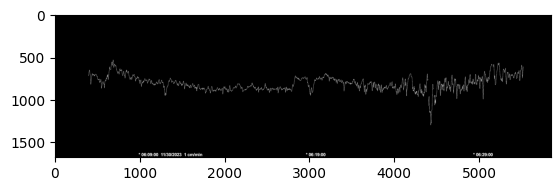

In [147]:
imshow(cv.threshold(upper_graph_g, 200, 255, cv.THRESH_BINARY_INV)[1])

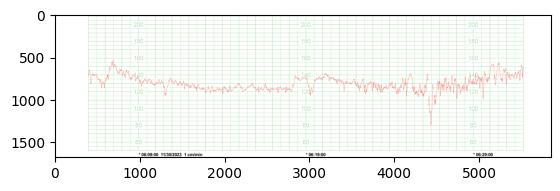

In [148]:
imshow(upper_graph)

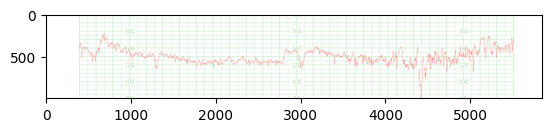

In [149]:
baby_graph_mask = np.uint8(np.zeros(upper_graph.shape[:2]))
start = 315
end = 1300
cv.rectangle(baby_graph_mask, (0, start), (img.shape[1], end), 255, -1)
baby_graph = cv.bitwise_and(upper_graph, upper_graph, mask=baby_graph_mask)
baby_graph = baby_graph[start:end, :]
imshow(baby_graph)

In [150]:
baby_graph_b, baby_graph_g, baby_graph_r = cv.split(baby_graph)

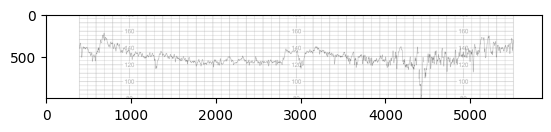

In [151]:
imshow(baby_graph_b)

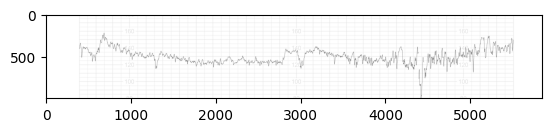

In [152]:
imshow(baby_graph_g)

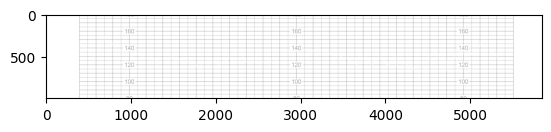

In [153]:
imshow(baby_graph_r)

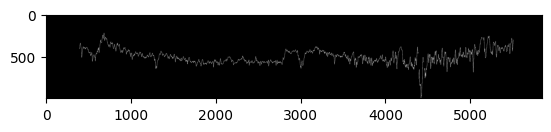

In [154]:
_, th_baby_graph_g = cv.threshold(baby_graph_g, 200, 255, cv.THRESH_BINARY_INV)
imshow(th_baby_graph_g)

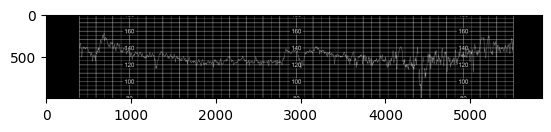

In [155]:
_, th_baby_graph_b = cv.threshold(baby_graph_b, 189, 255, cv.THRESH_BINARY_INV)
imshow(th_baby_graph_b)

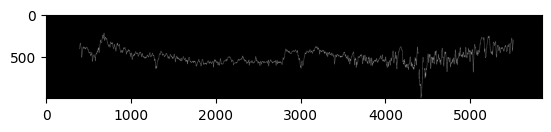

In [156]:
th_baby_graph = cv.bitwise_and(th_baby_graph_b, th_baby_graph_g)
imshow(th_baby_graph)

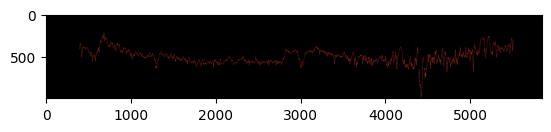

In [157]:
baby_graph_only = cv.bitwise_and(baby_graph, baby_graph, mask=th_baby_graph)
imshow(baby_graph_only)

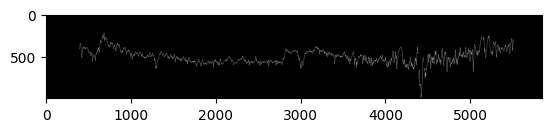

In [158]:
contours, _ = cv.findContours(th_baby_graph, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = [ c for c in contours if cv.contourArea(c) >= 100 ]

baby_contour = np.uint8(np.zeros(th_baby_graph.shape))
cv.drawContours(baby_contour, contours, -1, 255, -1)
imshow(baby_contour)

In [159]:
def get_white_contour_points(img, csv_fname=''):
    data = {}
    white_pixels = np.argwhere(img == 255)

    for y, x in white_pixels:
        if x not in data:
            data[x] = [ y ]
        else:
            data[x] += [ y ]

    data_points = [ ( x, np.average(ys).astype(np.int64) ) for x, ys in data.items() ]

    if csv_fname != '':
        with open(csv_fname, 'w') as f:
            f.write('x,y\n')
            for x, y in sorted(data_points, key=lambda x: x[0]):
                f.write(f'{x},{y}\n')

    return data_points

In [160]:
baby_data_points = get_white_contour_points(baby_contour, 'holabebe.csv')

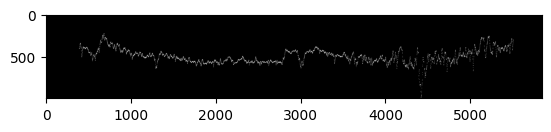

In [161]:
black = np.uint8(np.zeros(baby_contour.shape[:2]))
for x, y in baby_data_points:
    black[y, x] = 255
black = cv.dilate(black, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5)))
imshow(black)

# Contracture extraction (me duele la espalda para los que no sepan ingles)

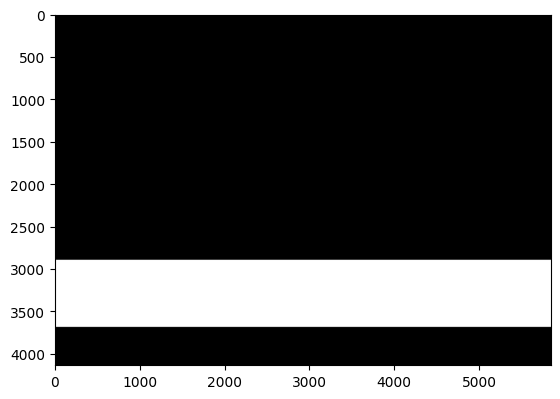

In [162]:
contraction_mask = np.uint8(np.zeros(img.shape[:2]))
contraction_graph_start = 2895
contraction_graph_end = 3685
cv.rectangle(contraction_mask, (0, contraction_graph_start), (img.shape[1], contraction_graph_end), 255, -1)
imshow(contraction_mask, fx=0.2, fy=0.2)

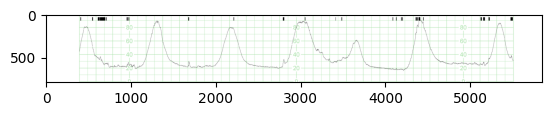

In [163]:
contraction_graph = cv.bitwise_and(img, img, mask=contraction_mask)
contraction_graph = contraction_graph[contraction_graph_start:contraction_graph_end, :]
imshow(contraction_graph)

In [168]:
contraction_graph_b, contraction_graph_g, contraction_graph_r = cv.split(contraction_graph)
# imshow(contraction_graph_r, 'contraction_graph_r', use_cv=True)
# imshow(contraction_graph_g, 'contraction_graph_g', use_cv=True)
# imshow(contraction_graph_b, 'contraction_graph_b', use_cv=True)

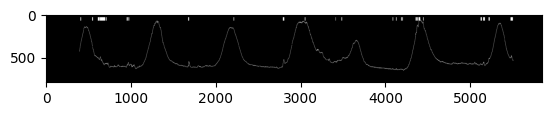

In [165]:
_, th_contraction_graph = cv.threshold(contraction_graph_g, 200, 255, cv.THRESH_BINARY_INV)
imshow(th_contraction_graph)

In [166]:
contraction_contours, _ = cv.findContours(th_contraction_graph, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_cpy = np.zeros((*th_contraction_graph.shape[:2], 3))
contraction_contours = sorted(contraction_contours, key=lambda x : cv.contourArea(x), reverse=True)
contraction_contours = [ x for x in contraction_contours if cv.contourArea(x) >= 100 ]
cv.drawContours(img_cpy, contraction_contours, 0, (0, 0, 255))
imshow(img_cpy)

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


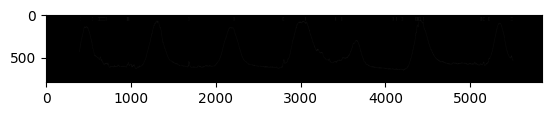

In [167]:
_, th_contraction_graph_2 = cv.threshold(contraction_graph_g, 0, 255, cv.THRESH_OTSU)
th_contraction_graph_2 = cv.bitwise_not(th_contraction_graph_2, th_contraction_graph_2)

contraction_graph_filtered = cv.bitwise_and(contraction_graph_g, contraction_graph_g, mask=th_contraction_graph_2)
imshow(contraction_graph_filtered)

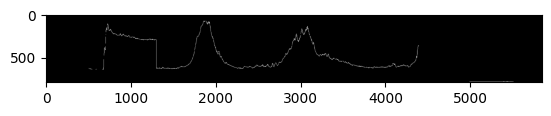

In [ ]:
contraction_graph_mask = np.uint8(np.zeros(contraction_graph_filtered.shape))
cv.rectangle(contraction_graph_mask, (0, 80), contraction_graph_mask.shape[::-1], 255, -1)

contraction_graph_final = cv.bitwise_and(contraction_graph_filtered, contraction_graph_filtered, mask=contraction_graph_mask)
_, contraction_graph_final = cv.threshold(contraction_graph_final, 0, 255, cv.THRESH_BINARY)
imshow(contraction_graph_final)

In [ ]:
contraction_data_points = get_white_contour_points(contraction_graph_final, 'contraction_points.csv')
len(contraction_data_points)

4260

In [ ]:
black = np.uint8(np.zeros(contraction_graph_final.shape[:2]))
for x, y in contraction_data_points:
    black[y, x] = 255

black = cv.dilate(black, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5)))
imshow(black)

# Get contraction peaks

In [ ]:
contraction_threshold = 600

contraction_graph_study = contraction_graph_final.copy()
contraction_graph_viz = np.uint8(np.zeros((*contraction_graph_final.shape[:2], 3)))
for x, y in contraction_data_points:
    contraction_graph_viz[y, x] = ( 255, 255, 255 )

cv.line(contraction_graph_viz, (0, contraction_threshold), (contraction_graph_viz.shape[1], contraction_threshold), (0, 255, 255))

contraction_graph_viz = cv.dilate(contraction_graph_viz, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5)))
imshow(contraction_graph_viz, use_cv=True)

In [ ]:
cv.imwrite('img.png', contraction_graph_viz)

True

In [ ]:
sorted(contraction_data_points, key=lambda x: x[0])

[array([502, 630]),
 array([503, 630]),
 array([504, 630]),
 array([505, 630]),
 array([506, 630]),
 array([507, 630]),
 array([508, 630]),
 array([509, 633]),
 array([510, 633]),
 array([511, 633]),
 array([512, 633]),
 array([513, 633]),
 array([514, 633]),
 array([515, 636]),
 array([516, 636]),
 array([517, 636]),
 array([518, 636]),
 array([519, 636]),
 array([520, 636]),
 array([521, 636]),
 array([522, 636]),
 array([523, 636]),
 array([524, 636]),
 array([525, 636]),
 array([526, 636]),
 array([527, 636]),
 array([528, 636]),
 array([529, 638]),
 array([530, 638]),
 array([531, 638]),
 array([532, 640]),
 array([533, 640]),
 array([534, 640]),
 array([539, 641]),
 array([540, 641]),
 array([541, 641]),
 array([542, 643]),
 array([543, 643]),
 array([544, 643]),
 array([585, 643]),
 array([586, 643]),
 array([587, 643]),
 array([588, 643]),
 array([589, 641]),
 array([590, 641]),
 array([591, 641]),
 array([595, 640]),
 array([596, 640]),
 array([597, 640]),
 array([598, 640]),


In [ ]:
x, y = contraction_data_points[0]
print(x, y)

1855 83


In [ ]:
points_at_th = []

lookback = 10
histeresis = 50

for i, (x, y) in enumerate(contraction_data_points):
    if i <= lookback:
        continue


    if y > contraction_threshold - histeresis and contraction_data_points[i - lookback][1] < contraction_threshold + histeresis:
        print(x, y, i - lookback, contraction_data_points[i - lookback][1])
    elif y < contraction_threshold - histeresis and contraction_data_points[i - lookback][1] > contraction_threshold + histeresis:
        print(x, y, i - lookback, contraction_data_points[i - lookback][1])


679 572 1625 523
680 572 1626 523
681 572 1627 523
1709 552 1739 547
1710 552 1740 547
1711 552 1741 547
2092 552 1742 547
2093 552 1743 547
2094 552 1744 547
2779 552 1745 548
2780 552 1746 548
2781 552 1747 548
3482 552 1748 548
3483 552 1749 552
3484 552 1750 552
4345 553 1754 552
4346 553 1755 552
4347 553 1756 552
4348 553 1757 552
1705 555 1761 550
1706 555 1762 550
1707 555 1763 550
1708 555 1764 553
2775 553 1765 553
2776 553 1766 553
2777 553 1767 553
2778 553 1768 550
3525 555 1769 550
3526 555 1770 550
3527 555 1771 555
3528 555 1772 555
3529 555 1773 555
3530 555 1774 555
3531 555 1775 553
2095 557 1776 553
2096 557 1777 553
2097 557 1778 553
2098 557 1779 555
2749 558 1780 555
2750 558 1781 555
2751 558 1782 555
2772 558 1783 555
2773 558 1784 555
2774 558 1785 555
3512 558 1786 557
3513 558 1787 557
3514 558 1788 557
3522 558 1789 557
3523 558 1790 558
3524 558 1791 558
1702 562 1792 558
1703 562 1793 558
1704 562 1794 558
2099 560 1795 558
2100 560 1796 558
2101 560 1797